In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
train.shape

(1460, 81)

In [5]:
train.isnull().sum().sort_values(ascending= False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
#missing data

In [7]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)
test.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


(1460, 81)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

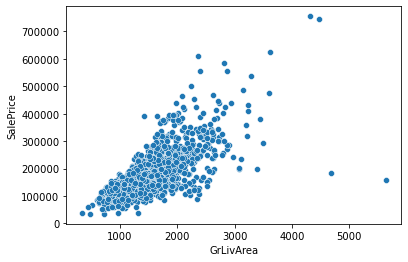

In [8]:
#outliers
print(train.shape)
sns.scatterplot(y="SalePrice", x="GrLivArea", data=train)

In [9]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index, inplace=True)
print('Rows and columns after dropping outliers :' , train.shape )

Rows and columns after dropping outliers : (1458, 81)


Text(0.5, 1.0, 'MSSubClass Count')

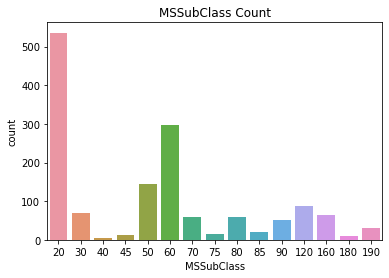

In [10]:
sns.countplot(x="MSSubClass",data=train)
plt.title('MSSubClass Count')  

In [11]:
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
features=[]
obj_col=[]
for col in cols:
    if (train[col].dtype) == object :
        obj_col.append(col)
obj_col        

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
#Plotting
def plotting(col):
    sns.countplot(x=col,data=train)
    plt.title('CountPlot for '+ col)
    print('No. of missing values are : ')
    print(train[col].isnull().sum())    

No. of missing values are : 
0


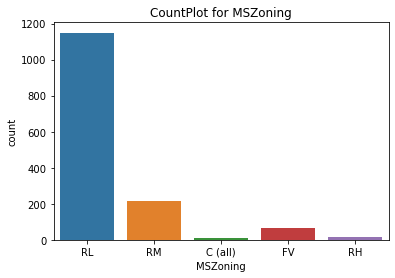

In [13]:
plotting('MSZoning')

No. of missing values are : 
0


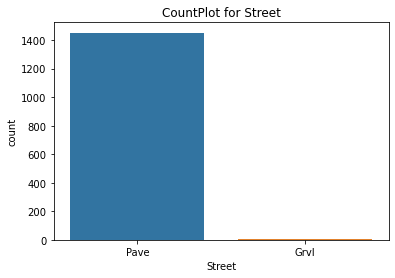

In [14]:
plotting('Street')

No. of missing values are : 
0


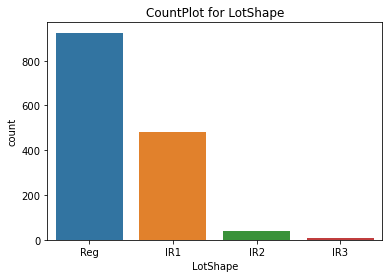

In [15]:
plotting('LotShape')
features.append('LotShape')
train.LotShape=train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})
test.LotShape=test.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

No. of missing values are : 
0


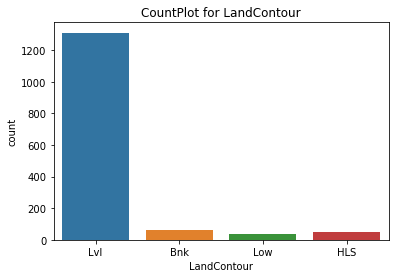

In [16]:
plotting('LandContour')



No. of missing values are : 
0


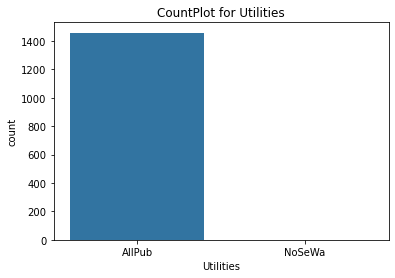

In [17]:
plotting('Utilities')

No. of missing values are : 
0


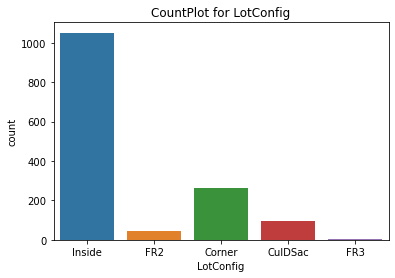

In [18]:
plotting('LotConfig')
features.append('LotConfig')
train.LotConfig=train.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})
test.LotConfig=test.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})

No. of missing values are : 
0


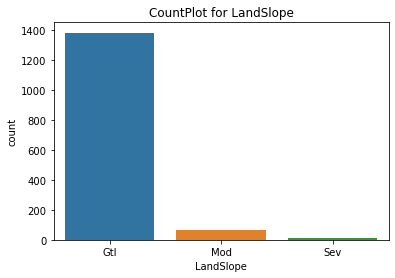

In [19]:
plotting('LandSlope')

                  SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       137500.000000
BrDale        104493.750000
BrkSide       124834.051724
ClearCr       212565.428571
CollgCr       197965.773333
Crawfor       210624.725490
Edwards       127318.571429
Gilbert       192854.506329
IDOTRR        100123.783784
MeadowV        98576.470588
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
NWAmes        189050.068493
NoRidge       335295.317073
NridgHt       316270.623377
OldTown       128225.300885
SWISU         142591.360000
Sawyer        136793.135135
SawyerW       186555.796610
Somerst       225379.837209
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
No. of missing values are : 
0


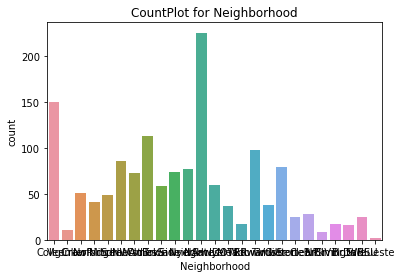

In [20]:
train_neighbor=train.copy()
print(train_neighbor[['Neighborhood','SalePrice']].groupby(['Neighborhood'],as_index=True).mean())
plotting('Neighborhood')
features.append('Neighborhood')
train.Neighborhood=train.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
test.Neighborhood=test.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

No. of missing values are : 
0


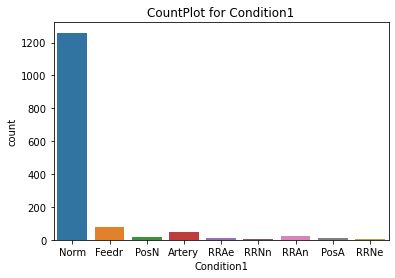

In [21]:
plotting('Condition1')   

No. of missing values are : 
0


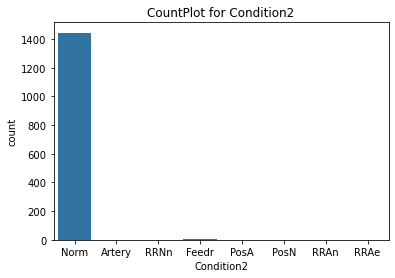

In [22]:
plotting('Condition2')

No. of missing values are : 
0


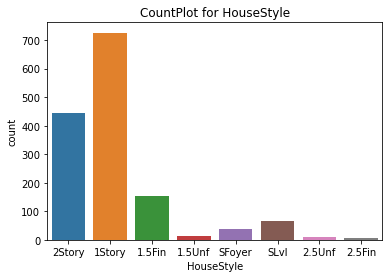

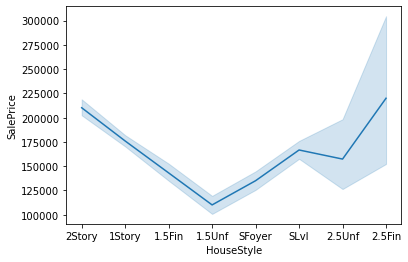

In [23]:
plotting('HouseStyle')
plt.show()
sns.lineplot(y='SalePrice',x='HouseStyle',data=train)
features.append('HouseStyle')
train.HouseStyle=train.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
test.HouseStyle=test.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

No. of missing values are : 
0


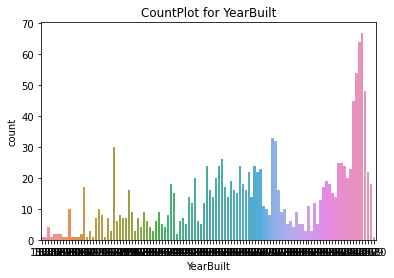

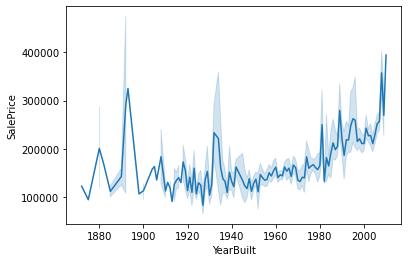

In [24]:
plotting('YearBuilt')
plt.show()
sns.lineplot(y='SalePrice',x='YearBuilt',data=train)

features.append('YearBuilt')

No. of missing values are : 
0


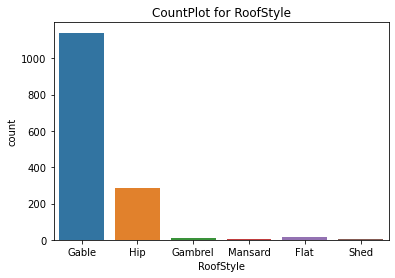

No. of missing values are : 
0


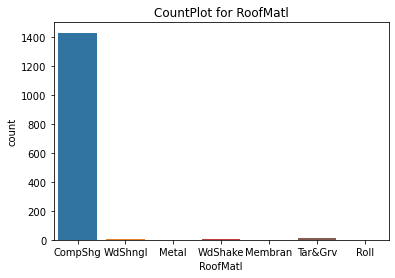

In [25]:
plotting('RoofStyle')
plt.show()
plotting('RoofMatl')

No. of missing values are : 
0


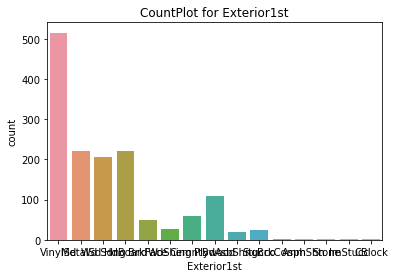

No. of missing values are : 
0


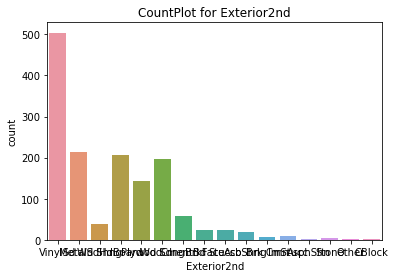

In [26]:
plotting('Exterior1st')
plt.show()
plotting('Exterior2nd')
plt.show()
train.Exterior1st=train.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
test.Exterior1st=test.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                            'Stone':7, 'ImStucc':7})
features.append('Exterior1st')

No. of missing values are : 
0


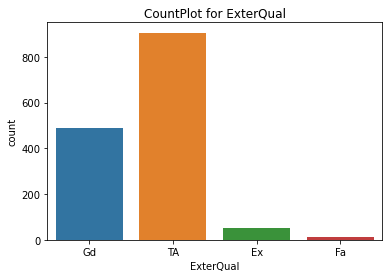

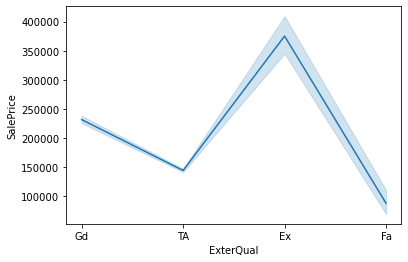

In [27]:
plotting('ExterQual')
plt.show()
sns.lineplot(y='SalePrice',x='ExterQual',data=train)
features.append('ExterQual')
train.ExterQual = train.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test.ExterQual = test.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

No. of missing values are : 
0


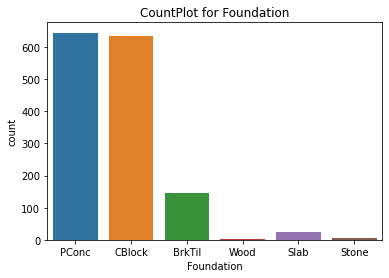

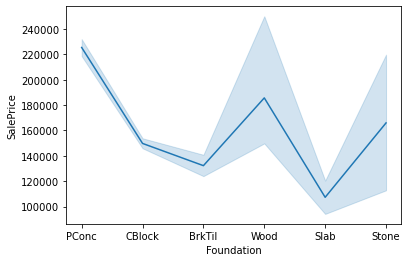

In [28]:
plotting('Foundation')
plt.show()
sns.lineplot(y='SalePrice',x='Foundation',data=train)
train.Foundation=train.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
test.Foundation=test.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
features.append('Foundation')

No. of missing values are : 
37


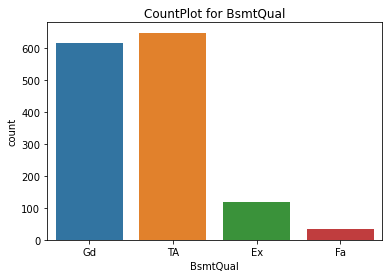

In [29]:
plotting('BsmtQual')
train.BsmtQual=train.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
test.BsmtQual=test.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
features.append('BsmtQual')

No. of missing values are : 
38


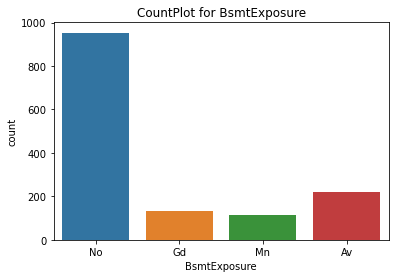

In [30]:
plotting('BsmtExposure')
train.BsmtExposure=train.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
test.BsmtExposure=test.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4}) 
features.append('BsmtExposure')

No. of missing values are : 
0


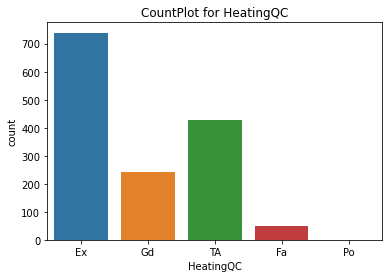

In [31]:
plotting('HeatingQC')
train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
test.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('HeatingQC')

No. of missing values are : 
0


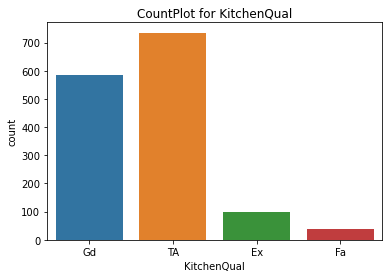

In [32]:
plotting('KitchenQual')
train.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
test.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
features.append('KitchenQual') 

No. of missing values are : 
690


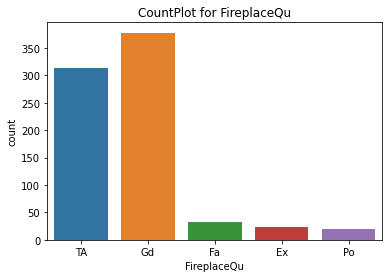

In [33]:
plotting('FireplaceQu')
train.FireplaceQu.fillna('None',inplace=True)
train.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
test.FireplaceQu.fillna('None',inplace=True)
test.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('FireplaceQu')

No. of missing values are : 
81


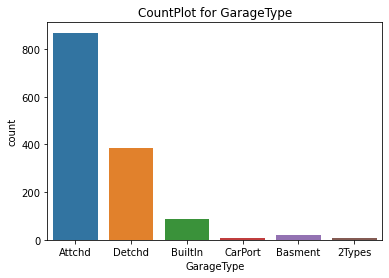

In [34]:
plotting('GarageType')
train.GarageType.fillna('None',inplace=True)
test.GarageType.fillna('None',inplace=True)
train.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
test.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
features.append('GarageType')

No. of missing values are : 
81


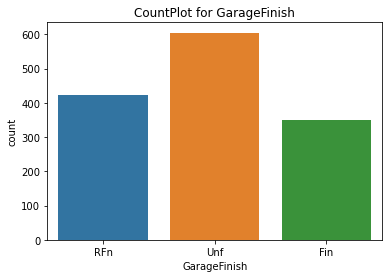

In [35]:
plotting('GarageFinish')
train.GarageFinish.fillna('None',inplace=True)
test.GarageFinish.fillna('None',inplace=True)
train.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
test.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
features.append('GarageFinish')

In [36]:
full=pd.concat([train,test],ignore_index=True)
full.drop('Id',axis=1,inplace=True)
full.shape

(2917, 80)

In [37]:
full.isnull().sum().sort_values(ascending=False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
                ... 
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
CentralAir         0
Length: 80, dtype: int64

In [38]:
train.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
1              27.800000   21.0    15
2              49.400000   50.0    50
3              62.440000   60.0   250
4              74.123552   71.0   259
5              63.930233   69.0    43
6              77.409722   76.0   144
7              70.726804   70.0   194
8              68.400000   75.0   115
9              62.700000   61.5    20
10             84.908257   90.0   109

In [39]:
train['LotAreaCut'] = pd.qcut(train.LotArea,10)
train.groupby([train['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])
test['LotAreaCut'] = pd.qcut(test.LotArea,10)
test.groupby([test['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                          mean median count
LotAreaCut                                 
(1469.999, 4793.0]   34.259843   32.0   127
(4793.0, 6958.4]     55.398551   52.0   138
(6958.4, 7843.8]     61.534351   61.0   131
(7843.8, 8640.0]     67.368000   65.0   125
(8640.0, 9399.0]     69.694915   70.0   118
(9399.0, 10125.8]    73.289062   75.0   128
(10125.8, 10940.2]   73.395349   76.0   129
(10940.2, 12194.4]   81.508929   80.5   112
(12194.4, 14259.0]   85.067227   85.0   119
(14259.0, 56600.0]   92.266667   90.0   105

In [40]:
train['LotFrontage']= train.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
test['LotFrontage']= test.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

These columns are having plenty of missing values , so it is good idea  to fill them with 0.

In [41]:
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:
    train[col].fillna(0,inplace= True)
for col in columns:
    test[col].fillna(0,inplace=True)

In [42]:
columns1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
"GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col1 in columns1:
    train[col1].fillna('None',inplace = True)
    test[col1].fillna('None',inplace=True)

These columns are having very few missing values , so I'm filling them with their mode.

In [43]:
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col2 in columns2:
    train[col2].fillna(full[col2].mode()[0],inplace = True)
    test[col2].fillna(full[col2].mode()[0],inplace = True)

In [44]:
train.drop("LotAreaCut",axis=1,inplace=True)
test.drop("LotAreaCut",axis=1,inplace=True)

In [45]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [46]:
cols_num = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for i in cols_num :
    train[i]=train[i].astype(str)
    test[i]=test[i].astype(str)

In [47]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [48]:
train.isnull().sum(0).sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

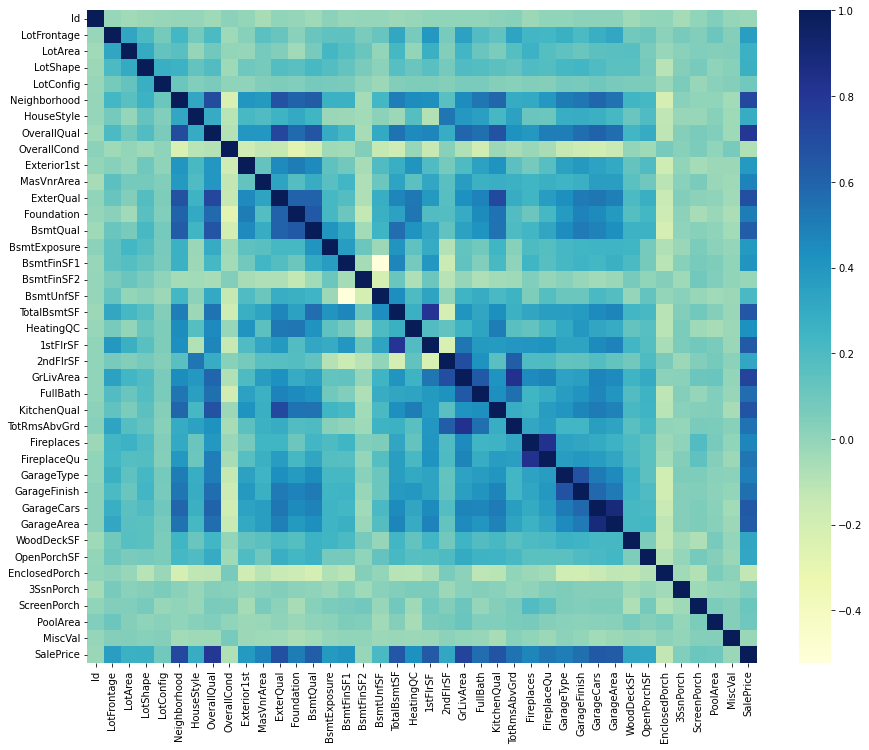

In [49]:
#heatmap:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),cmap="YlGnBu")
plt.show()

In [50]:
core=train.corr()
core_des=core.sort_values(by='SalePrice',ascending=False)
core_des

,Id,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
SalePrice,-0.021673,0.360375,0.268179,0.270477,0.092499,0.714816,0.292263,0.795774,-0.077948,0.383349,...,0.641047,0.629217,0.324758,0.321142,-0.128646,0.044568,0.111415,0.099490,-0.021203,1.000000
OverallQual,-0.030213,0.203675,0.091392,0.190817,0.064424,0.698303,0.295311,1.000000,-0.090442,0.396564,...,0.600741,0.557230,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.795774
GrLivArea,0.003138,0.351644,0.232927,0.192468,0.060986,0.445915,0.387912,0.589414,-0.077423,0.201821,...,0.475442,0.456358,0.247120,0.302569,0.012976,0.022520,0.107768,0.115999,-0.001637,0.734968
Neighborhood,-0.005199,0.228306,0.163314,0.258677,0.110011,1.000000,0.319249,0.698303,-0.227835,0.402851,...,0.589046,0.547840,0.241284,0.224299,-0.203173,0.020038,0.002484,0.001841,-0.045537,0.714816
ExterQual,0.003413,0.121906,0.040373,0.180443,0.051259,0.672615,0.252170,0.723286,-0.137724,0.453298,...,0.525960,0.490152,0.205586,0.279707,-0.149025,0.037582,0.013799,0.012827,-0.039184,0.686756
KitchenQual,0.013709,0.139116,0.055988,0.151122,0.034402,0.594952,0.224432,0.670627,-0.025207,0.414404,...,0.509042,0.485394,0.219112,0.249783,-0.105126,0.022769,0.031731,0.046646,-0.054012,0.662236
TotalBsmtSF,-0.025908,0.312767,0.223914,0.172605,0.042197,0.499270,-0.028472,0.538595,-0.174931,0.274877,...,0.451890,0.475069,0.234476,0.215140,-0.096773,0.040921,0.092574,0.036089,-0.018514,0.651153
GarageCars,0.016863,0.279988,0.152484,0.194461,0.097318,0.589046,0.272117,0.600741,-0.185275,0.343039,...,1.000000,0.887304,0.225462,0.209968,-0.151110,0.035957,0.050909,0.019446,-0.043004,0.641047
1stFlrSF,0.003921,0.393197,0.269234,0.165273,0.048999,0.430266,-0.086386,0.469092,-0.144717,0.194570,...,0.449195,0.477299,0.235439,0.178859,-0.064247,0.059521,0.095042,0.062756,-0.021045,0.631530
GarageArea,0.014316,0.316804,0.163680,0.161068,0.068097,0.547840,0.221161,0.557230,-0.150503,0.308125,...,0.887304,1.000000,0.222482,0.228246,-0.121194,0.035880,0.053015,0.026642,-0.027236,0.629217


In [51]:
core_des_top=core_des[(core_des['SalePrice']>0.5) & (core_des['SalePrice'] !=1)]
core_des_top.index

Index(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation'],
      dtype='object')

In [52]:
features.append(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation'])

In [53]:
core_des_low=core_des[(core_des['SalePrice']<0)]
core_des_low.index

Index(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch'], dtype='object')

In [54]:
features.append(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch'])

In [55]:
features=['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'OverallQual',
  'GrLivArea',
  'Neighborhood',
  'ExterQual',
  'KitchenQual',
  'TotalBsmtSF',
  'GarageCars',
  '1stFlrSF',
  'GarageArea',
  'BsmtQual',
  'FullBath',
  'GarageFinish',
  'TotRmsAbvGrd',
  'FireplaceQu',
  'Foundation',
 'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch','SalePrice']

In [56]:
train_d=train.copy()

In [57]:
train_d=train_d[features]

In [58]:
train_d

,LotShape,LotConfig,Neighborhood,HouseStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,...,GarageFinish,TotRmsAbvGrd,FireplaceQu,Foundation,BsmtFinSF2,MiscVal,Id,OverallCond,EnclosedPorch,SalePrice
0,1,1,7,4,5,3,4,4,2,5,...,3,8,1,4,0,0,1,5,0,208500
1,1,4,8,3,3,2,2,4,4,5,...,3,6,3,2,0,0,2,8,0,181500
2,2,1,7,4,5,3,4,4,3,5,...,3,6,3,4,0,0,3,5,0,223500
3,2,2,7,4,3,2,2,3,2,4,...,2,7,4,2,0,0,4,5,272,140000
4,2,4,10,4,5,3,4,4,3,5,...,3,9,3,4,0,0,5,5,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,6,4,5,2,4,4,2,5,...,3,7,3,4,0,0,1456,5,0,175000
1456,1,1,6,3,4,2,2,4,2,3,...,2,7,3,2,163,0,1457,6,0,210000
1457,1,1,7,4,6,4,2,3,2,5,...,3,9,4,2,0,2500,1458,9,0,266500
1458,1,1,4,3,3,2,2,3,3,4,...,2,5,1,2,1029,0,1459,6,112,142125


In [59]:
train_d=pd.get_dummies(train_d)

In [60]:
test_d=pd.get_dummies(test)

In [61]:
test_d.drop(['Id'],axis=1,inplace=True)

In [62]:
train_d.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch',
       'SalePrice'],
      dtype='object')

In [63]:
for col in train_d.columns:
    print(col,)

LotShape
LotConfig
Neighborhood
HouseStyle
Exterior1st
ExterQual
Foundation
BsmtQual
BsmtExposure
HeatingQC
KitchenQual
FireplaceQu
GarageType
GarageFinish
OverallQual
GrLivArea
Neighborhood
ExterQual
KitchenQual
TotalBsmtSF
GarageCars
1stFlrSF
GarageArea
BsmtQual
FullBath
GarageFinish
TotRmsAbvGrd
FireplaceQu
Foundation
BsmtFinSF2
MiscVal
Id
OverallCond
EnclosedPorch
SalePrice


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
predictors=train_d.drop(['Id','SalePrice'],axis=1)
target=train.SalePrice
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.35,random_state=0)

In [65]:
from sklearn.model_selection import KFold,cross_val_score
logreg = LinearRegression()
logreg.fit(x_train, y_train)

LinearRegression()

In [66]:
logreg.predict(x_cv)

array([142649.08349774, 152291.94805513,  36833.33014588, 125660.57342277,
       284009.50468679, 118176.35475852, 211406.3746105 , 118865.41696579,
       143327.57584468, 139550.65735551, 194412.2503937 ,  98495.20316493,
       104145.432072  , 149292.13313296,  86740.47807506, 237468.94898337,
       218765.69026462,  80357.44368881, 163840.31108174, 378530.86997738,
       291984.32420908, 103351.08213894, 121178.05833915,  94216.47411736,
        99632.64908188, 227240.50296149, 209910.33016852, 101014.45768293,
       132480.30272496, 377379.5427292 , 179134.8587898 , 226567.94558407,
       151418.77940622, 234403.80566151,  78971.82711589, 109907.45687209,
       229078.86882511, 289214.82966141,  97737.84534332,  52620.70262746,
       126579.6104191 , 237779.48930344, 120237.06230933, 112318.36546768,
       189379.25202632, 168753.91409744, 315467.0694483 , 316931.95862269,
       405267.90703419, 255762.91774403, 255291.69166242,  94751.63114639,
       162695.51693197, 1

In [67]:
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(x_cv)
logreg.score(x_cv,y_cv)

0.8508492595138961

In [68]:
features_train=['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'BsmtFinSF2', 'MiscVal','OverallCond', 'EnclosedPorch']


In [69]:
test_p=test[features_train]
test_p=pd.get_dummies(test_p)

In [70]:
test_X = test_p
predicted_prices = logreg.predict(test_X)
predicted_prices

array([114111.25593272, 187494.25170507, 164735.38453939, ...,
       157160.44853548, 103006.04926299, 203045.70613963])

In [71]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('final.csv', index=False)